## Stockholm Hosuing Demand Analysis

This analysis aims to show the average days required to sell a property in Stockholm change during the last 18 months.

In [6]:
import pandas as pd
import numpy as np
from io import BytesIO 
from google.cloud import storage
from datetime import datetime
from dateutil.parser import parse
import google.datalab.bigquery as bq


#%gcs read --object "gs://[BUCKET ID]/[FILE].csv" --variable csv_as_bytes

%gcs read --object "gs://[BUCKET ID]/data/sold_properties_stockholm_apr16_to_oct17.csv" --variable sold_properties_data

data = pd.read_csv(BytesIO(sold_properties_data), sep=';')

# Convert string type data collumns to date type.
data['publish_date'] = pd.Series([pd.to_datetime(publish_date).date() for publish_date in data['publish_date']])
data['sold_date'] = pd.Series([pd.to_datetime(sold_date).date() for sold_date in data['sold_date']])

print(data.head())
print(type(data['publish_date'][1]))


   id publish_date   sold_date  days_to_sell  AskingPrice munaciplity_name  \
0   6   2016-03-27  2016-04-30            34    4700000.0        Stockholm   
1   9   2016-03-27  2016-04-07            11    2395000.0        Stockholm   
2  11   2016-03-27  2016-04-16            20    1650000.0         Botkyrka   
3  15   2016-03-27  2016-04-07            11    1495000.0            Nacka   
4  20   2016-03-27  2016-05-14            48    1750000.0        Stockholm   

  property_type  
0        Radhus  
1   Bostadsratt  
2   Bostadsratt  
3   Bostadsratt  
4   Bostadsratt  
<type 'datetime.date'>


In [7]:
%%bq query --name sold_properties
SELECT publish_date, sold_date, munaciplity_name as municipality_name, property_type,avg(cast(days_to_sell as INT64)) as avg_days_to_sell
FROM `bojakt.sold_properties_stockholm_apr16_to_oct17_2` 
group by municipality_name, sold_date, publish_date, property_type

In [8]:
%%bq execute --query sold_properties

publish_date,sold_date,municipality_name,property_type,avg_days_to_sell
2016-04-06,2016-04-06,Sollentuna,Bostadsratt,0.0
2016-04-09,2016-04-09,Nacka,Tomt,0.0
2016-04-16,2016-04-16,Stockholm,Bostadsratt,0.0
2016-05-10,2016-05-10,Nacka,nyproduktion,0.0
2016-05-10,2016-05-10,Sollentuna,nyproduktion,0.0
2016-05-10,2016-05-10,Järfälla,nyproduktion,0.0
2016-05-10,2016-05-10,Stockholm,nyproduktion,0.0
2016-05-10,2016-05-10,Täby,nyproduktion,0.0
2016-05-10,2016-05-10,Sundbyberg,nyproduktion,0.0
2016-05-12,2016-05-12,Upplands-Bro,Fritidshus,0.0


In [9]:
days_to_sell = sold_properties.execute(output_options=bq.QueryOutput.dataframe()).result()

In [10]:
days_to_sell[:5]

,publish_date,sold_date,municipality_name,property_type,avg_days_to_sell
0,2016-04-06,2016-04-06,Sollentuna,Bostadsratt,0.0
1,2016-04-09,2016-04-09,Nacka,Tomt,0.0
2,2016-04-16,2016-04-16,Stockholm,Bostadsratt,0.0
3,2016-05-10,2016-05-10,Nacka,nyproduktion,0.0
4,2016-05-10,2016-05-10,Sollentuna,nyproduktion,0.0


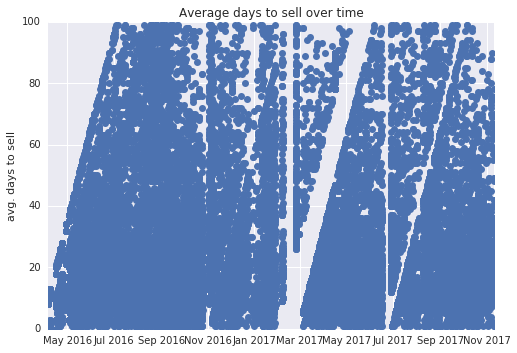

In [23]:
import matplotlib.pyplot as plt
plt.plot_date(x=days_to_sell.sold_date,y=days_to_sell.avg_days_to_sell)
plt.title("Average days to sell over time")
plt.ylabel("avg. days to sell")
plt.grid(True)
plt.show()
